#Importaciones

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib as plt


In [22]:
#Descargamos la data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [23]:
#50000 imagenes con dimension 32 x 32 pixeles  3 capas de color
x_train.shape

(50000, 32, 32, 3)

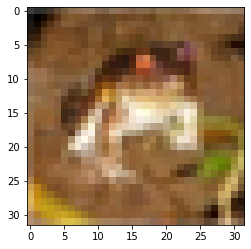

In [24]:
plt.pyplot.imshow(x_train[0])

#Limpiar Data

los valores de los datos son de 50,000 imagenes en 32 x 32 en las celdas los valores son de 0 a 255 y los transforma a modo que sean decimales, el mayor llega a 1 porque asi maneja mejor el proceso

Luego en los labels, etiquetas,  en ellas tienes valores de 0 a 9, por el tipo de fotos, y lo transforma para que sea asi, el numero 2 pasa a ser 0,0,1,0,0,0,0,0,0,0 el numero 5 para a ser 0,0,0,0,0,1,0,0,0,0


In [25]:
#Limpiamos datos

#los pixeles que manejan las imagenes van de 1 a 255
#queremos estandarizar la data de 0 a 1 de manera decimal 
#ya que las ANN funcionan mejor con decimales
x_train = x_train.astype('float32') #/ 255
y_train = y_train.astype('float32') #/ 255


In [ ]:
#reshape a 6000, 28, 28, 1(1 canal de color, osea de negro a blanco, rgb = 3 canales)

#train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
#test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [26]:
#cuantas labels hay
num_clases=len(np.unique(y_train))
print("num de clases:",num_clases)

#Limpiamos data labels
# pasamos de un integro a una array ejemplo 5 to 0,0,0,0,1,0,0,0,0,0
y_train = to_categorical(y_train, num_clases)
y_test = to_categorical(y_test, num_clases)

y_train[0]

num de clases: 10


array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [27]:
#NORMALIZAR DATOS
# datos - media/desviacionEstandar

mean = np.mean(x_train)
std = np.std(x_train) 

x_train = (x_train - mean) / (std+1e-7) #le sumamos un numero muy pequeño en caso de que std sea 0 ya que n/0 = error
x_test = (x_test - mean) / (std+1e-7)

In [28]:
#DIVIDIR SET DE ENTRENAMIENTO EN SET DE : VALIDACION, TRAINING, TEST

(x_train, x_valid) = x_train[5000:] , x_train[:5000]
(y_train, y_valid) = y_train[5000:] , y_train[:5000]

print('x_train :',x_train.shape[0])
print('x_valid :',x_valid.shape[0])
print('x_test :',x_test.shape[0])

x_train : 45000
x_valid : 5000
x_test : 10000


#MODELO DE DATOS

In [29]:
base_filtros=32
w_regulatizer=1e-4

model = Sequential()
## conv 1     ,a cada bloque de convolucion le añadimos batch regularization
model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

## conv 2
model.add(Conv2D(base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #max pooling despues de cada convolucion
model.add(Dropout(0.2))  #dropout para disminuir overfitting

## conv 3          multiplicamos la base de filtros por 2 para añadir profundidad
model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

## conv 4
model.add(Conv2D(2*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.3))

## conv 5          base de filtros * 4 para añadir profundidad
model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())


## conv 6
model.add(Conv2D(4*base_filtros, (3,3), padding='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

## Clasificacion - Flatten

model.add(Flatten()) 
model.add(Dense(num_clases,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                      

In [36]:

datagen = ImageDataGenerator(rotation_range=15,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              horizontal_flip=True,
                              vertical_flip=True) 

#COMPILAR & ENTRENAR

In [35]:
from tensorflow.keras import optimizers

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Adam(),
             metrics=['accuracy'])

In [33]:
#hist= model.fit(x_train,
#                y_train,
#                batch_size=32,
#                epochs=20,
#                validation_data=(x_valid, y_valid),
#                verbose=2,shuffle=True
#                ) 

#                         guardamos el mejor modelo con el criterio de acuracy
chekpoint=ModelCheckpoint('the_best_model.hdf5',verbose=1,save_best_only=True, monitor = 'val_accuracy') 

In [43]:
hist= model.fit(datagen.flow(x_train, y_train, batch_size=10), #data generator modifica imagenes
                              callbacks=[chekpoint], #guarda el mejor modelo
                              steps_per_epoch=x_train.shape[0] // 10, #cuantos conjuntos tengo por bach size
                              epochs=10,
                              verbose=2,
                              validation_data=(x_valid, y_valid)
              
)

Epoch 1/10

Epoch 1: val_accuracy did not improve from 0.62480
4500/4500 - 37s - loss: 1.5013 - accuracy: 0.5067 - val_loss: 1.3547 - val_accuracy: 0.5832 - 37s/epoch - 8ms/step
Epoch 2/10

Epoch 2: val_accuracy improved from 0.62480 to 0.63240, saving model to the_best_model.hdf5
4500/4500 - 37s - loss: 1.3137 - accuracy: 0.5873 - val_loss: 1.1968 - val_accuracy: 0.6324 - 37s/epoch - 8ms/step
Epoch 3/10

Epoch 3: val_accuracy improved from 0.63240 to 0.66160, saving model to the_best_model.hdf5
4500/4500 - 37s - loss: 1.2665 - accuracy: 0.6117 - val_loss: 1.1206 - val_accuracy: 0.6616 - 37s/epoch - 8ms/step
Epoch 4/10

Epoch 4: val_accuracy did not improve from 0.66160
4500/4500 - 37s - loss: 1.2408 - accuracy: 0.6245 - val_loss: 1.1945 - val_accuracy: 0.6570 - 37s/epoch - 8ms/step
Epoch 5/10

Epoch 5: val_accuracy did not improve from 0.66160
4500/4500 - 37s - loss: 1.2241 - accuracy: 0.6405 - val_loss: 1.2138 - val_accuracy: 0.6534 - 37s/epoch - 8ms/step
Epoch 6/10

Epoch 6: val_acc

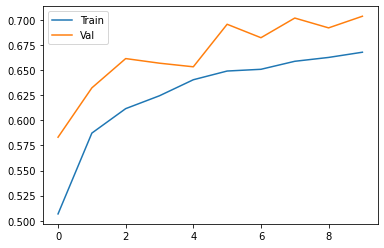

In [45]:
plt.pyplot.plot(hist.history['accuracy'],label='Train')
plt.pyplot.plot(hist.history['val_accuracy'],label='Val')
plt.pyplot.legend()
plt.pyplot.show()

#Cargar modelo 

In [47]:
model2 = model
model2.load_weights('./the_best_model.hdf5')

#provamos el modelo2
model2.evaluate(x_test,y_test)


313/313 [==============================] - 2s 6ms/step - loss: 1.1265 - accuracy: 0.6909


[1.1265380382537842, 0.6909000277519226]